In [1]:
## seeding for reproducibility
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)
import json
import os


In [2]:
## creating a dictory that will store the kaggle json file
kaggle_dictionary =  json.load(open('/content/kaggle.json'))

In [3]:
## loading thee data credentials into a the os environment
os.environ['Kaggle_Username']  =  kaggle_dictionary['username']
os.environ['kaggle_key']   =  kaggle_dictionary['key']

In [4]:
## loading the data
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
## Unzipping the data
from zipfile import ZipFile
dataset =  '/content/plantvillage-dataset.zip'
with ZipFile(dataset , 'r') as zip:
  zip.extractall()
  print('done')

done


In [6]:
## importing neccesary libraries
from tensorflow.keras import Sequential , models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense , Flatten , Dropout
import matplotlib.pyplot as plt
import cv2
import PIL as Image
import matplotlib.image as mpimg
from tensorflow.keras.layers import Conv2D , MaxPooling2D

In [7]:
!ls

 drive	 kaggle.json  'plantvillage dataset'   plantvillage-dataset.zip   sample_data


In [8]:
## checking the directories
## directories for plant village dataset
print(len(os.listdir('/content/plantvillage dataset')))
print(os.listdir('/content/plantvillage dataset'))


## checking the directoried for color
print('the color directory')
print('---------------------------------------------------------------------------------------------------------------------')
print(os.listdir('/content/plantvillage dataset/color')[:5])
print('-----------------------------------------------------------------------------------------------------------------------')
print(os.listdir('/content/plantvillage dataset/color')[-5:])
print(len(os.listdir('/content/plantvillage dataset/color')))
print('------------------------------------------------------------------------------------------------------------------------')


3
['color', 'grayscale', 'segmented']
the color directory
---------------------------------------------------------------------------------------------------------------------
['Tomato___Spider_mites Two-spotted_spider_mite', 'Raspberry___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Grape___Black_rot']
-----------------------------------------------------------------------------------------------------------------------
['Corn_(maize)___Common_rust_', 'Strawberry___Leaf_scorch', 'Potato___Early_blight', 'Tomato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
38
------------------------------------------------------------------------------------------------------------------------


In [9]:
## cheking the some directories in the color
print('Apple crab')
print(len(os.listdir('/content/plantvillage dataset/color/Apple___Apple_scab')))
print(os.listdir('/content/plantvillage dataset/color/Apple___Apple_scab')[:5])
print('---------------------------------------------------------------------------------------------------')

### for Blueberry heathly
print('Blue berry healthy')
print(len(os.listdir('/content/plantvillage dataset/color/Blueberry___healthy')))
print(os.listdir('/content/plantvillage dataset/color/Blueberry___healthy')[:5])
print('--------------------------------------------------------------------------------------------------------')

### grappe healthly
print('Grape Healthly')
print(len('/content/plantvillage dataset/color/Grape___healthy'))
print(os.listdir('/content/plantvillage dataset/color/Grape___healthy')[:5])
print('------------------------------------------------------------------------------------------------------------')



Apple crab
630
['6cee3edf-8909-418f-a27f-5e175e7ccd77___FREC_Scab 2951.JPG', '29ab8216-ec38-4efd-9c77-21068fa899a4___FREC_Scab 3241.JPG', 'e17c9433-0a90-4dd8-a2d8-08bb65c3d3d2___FREC_Scab 3306.JPG', '233b7aec-ccec-47a3-b5bd-27e154d7a8f7___FREC_Scab 2912.JPG', '78f8b36a-5126-4105-9699-39387015452f___FREC_Scab 2983.JPG']
---------------------------------------------------------------------------------------------------
Blue berry healthy
1502
['47d40ab4-2e5f-40ac-afb5-1ff6fa85efc2___RS_HL 5002.JPG', '8414bd37-f029-4748-baa3-373c63549003___RS_HL 5110.JPG', 'ca452b8f-d7d7-4637-836e-3685f9f0d2ec___RS_HL 0387.JPG', '4e50fefc-9714-4de1-8aa9-bb8963fe0bd6___RS_HL 4973.JPG', 'ec0039c4-0ec8-451e-8a83-b5d998a552e9___RS_HL 4897.JPG']
--------------------------------------------------------------------------------------------------------
Grape Healthly
51
['6d08f78b-51f3-4aae-9bb0-a575fc1bd76b___Mt.N.V_HL 9110.JPG', '698a1cd5-2ad0-4a76-bb73-65918083df56___Mt.N.V_HL 6160.JPG', '52bb5946-964f-4dce-a8b

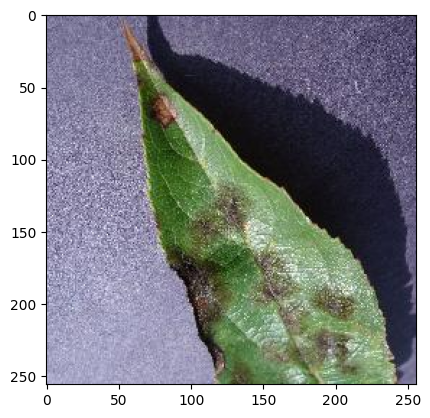

In [10]:
##  displaying some images from one of the subdirectories in thee plant village dataset
image_pic =  mpimg.imread('/content/plantvillage dataset/color/Apple___Apple_scab/6cee3edf-8909-418f-a27f-5e175e7ccd77___FREC_Scab 2951.JPG')
plt.imshow(image_pic)
plt.show()


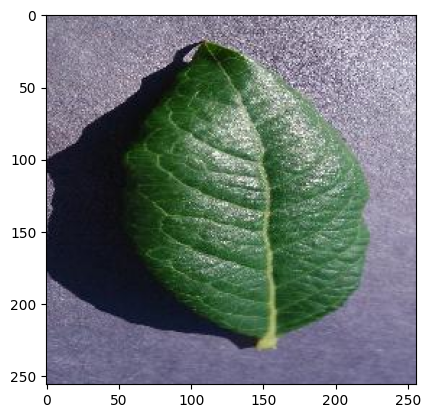

In [11]:
blueberry_pic =  mpimg.imread('/content/plantvillage dataset/color/Blueberry___healthy/47d40ab4-2e5f-40ac-afb5-1ff6fa85efc2___RS_HL 5002.JPG')
plt.imshow(blueberry_pic)

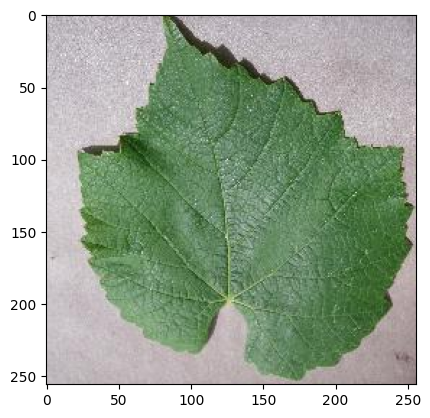

In [12]:
## grape_healthy
grape_healthy =  mpimg.imread('/content/plantvillage dataset/color/Grape___healthy/6d08f78b-51f3-4aae-9bb0-a575fc1bd76b___Mt.N.V_HL 9110.JPG')
plt.imshow(grape_healthy)
plt.show()

In [13]:
print(grape_healthy)

[[[160 155 161]
  [189 184 190]
  [187 182 188]
  ...
  [151 144 151]
  [168 161 168]
  [163 156 163]]

 [[203 198 204]
  [197 192 198]
  [176 171 177]
  ...
  [153 146 153]
  [170 163 170]
  [164 157 164]]

 [[180 175 181]
  [186 181 187]
  [177 172 178]
  ...
  [153 146 153]
  [173 166 173]
  [167 160 167]]

 ...

 [[190 184 188]
  [194 188 192]
  [197 191 195]
  ...
  [146 130 131]
  [142 126 127]
  [136 120 121]]

 [[190 184 188]
  [191 185 189]
  [193 187 191]
  ...
  [147 131 132]
  [142 126 127]
  [135 119 120]]

 [[192 186 190]
  [191 185 189]
  [191 185 189]
  ...
  [146 130 131]
  [141 125 126]
  [133 117 118]]]


In [14]:
##  setting some image data paremeters
img_size = 224
batch_size = 32


In [15]:
## data preprocesing
data_gen =  ImageDataGenerator(
  rescale =  1/255 ,
  validation_split =  0.2
)

In [16]:
base_dir = '/content/plantvillage dataset/color'

In [17]:
### the training dataset
train_gen =  data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size , img_size),
    batch_size = batch_size,
    class_mode ='categorical',
    subset ='training'
)

Found 43456 images belonging to 38 classes.


In [18]:
## the Validation dataset
vaildation_gen =  data_gen.flow_from_directory(
    base_dir ,
    target_size = (img_size , img_size),
    batch_size =  batch_size ,
    class_mode = 'categorical',
    subset='validation'

)

Found 10849 images belonging to 38 classes.


In [28]:
### BULDING THE MODEL
model =  models.Sequential()
### ADDING CONVOLUTION LAYERS SETUP
model.add(Conv2D(32 , (2,2),activation='relu',input_shape  =  (img_size , img_size , 3)))
model.add(MaxPooling2D((2,2)))
## setting the second set of convolution layer
model.add(Conv2D(64 ,(2,2),activation='relu'))
model.add(MaxPooling2D(2,2))

## setting up the Dense layers
model.add(Flatten())
model.add(Dense(32 , activation='relu'))
model.add(Dropout(0.3))
### Adding the output layer
model.add(Dense(train_gen.num_classes , activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 223, 223, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 110, 110, 64)        │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 55, 55, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 193600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │       6,195,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │           1,254 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,205,158 (23.67 MB)

 Trainable params: 6,205,158 (23.67 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
## compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
## fitting the model
history =  model.fit(train_gen ,
          steps_per_epoch= train_gen.samples//batch_size ,
          epochs=5,
          validation_data = vaildation_gen,
          validation_steps=vaildation_gen.samples//batch_size
          )

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 123s 84ms/step - accuracy: 0.1000 - loss: 3.5933 - val_accuracy: 0.1015 - val_loss: 3.3852
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 3.5018
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 94s 69ms/step - accuracy: 0.1028 - loss: 3.3685 - val_accuracy: 0.1015 - val_loss: 3.3488
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 4.4681
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 138s 69ms/step - accuracy: 0.0989 - loss: 3.3519 - val_accuracy: 0.1015 - val_loss: 3.3449


In [32]:
### Evaluating on test dat
loss , accuracy = model.evaluate(vaildation_gen , steps= vaildation_gen.samples//batch_size)

339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - accuracy: 0.1013 - loss: 3.3391


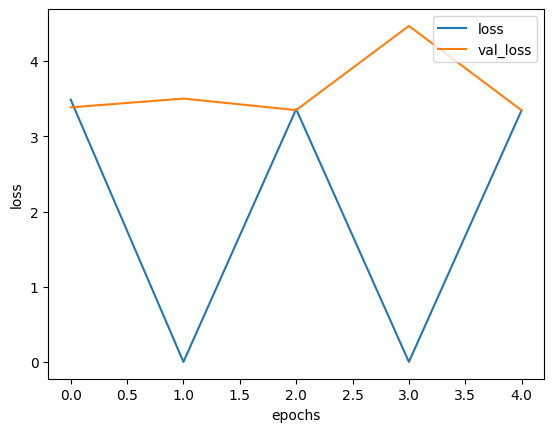

In [33]:
## plotting the data
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss','val_loss']  , loc = 'upper right')
